# Logistic regression

### Logistic regression for binary classification

$h_w(x) \approx P(y=1 \vert w; x)$, the probability that $y = 1$ given $x$, parametrized by $w$.

$$
h(x) = \sigma(b + w_1\cdot x_1 + w_2\cdot x_2 + \ldots + w_n\cdot x_n) = \sigma(w^T\cdot x + b),
$$
where
$$
\sigma(x) = \frac{1}{1 + e^{-x}}.
$$

If $h_w(x) = p$, then for the odds
$$
\frac{p}{1-p} = \text{e}^{w^T\cdot x + b},
$$
and the log-odds (logit) is
$$
\log\frac{p}{1-p} = w^T\cdot x + b
$$

The two classes are separated by a hyperplane: 
$$
y = 1 \iff w^T\cdot x + b >= 0.
$$

The cost function is derived from the ML function:

$$
L(w, b) = \prod_{x\colon y=1}h_w(x)\cdot\prod_{x\colon y=0}(1 - h_w(x)) \rightarrow \text{max!},
$$
that is, the negative loglikelihood function should be minimized:
$$
J(w, b) = \frac{1}{m}\sum_{i=1}^m\left(-y^{(i)}\cdot\log h_w(x^{(i)}) - (1 - y^{(i)})\cdot\log (1 - h_w(x^{(i)}))\right)
$$

Homework:
    
* show that $\sigma'(x) = \sigma(x)\cdot(1 - \sigma(x))$
* show that $$\frac{\partial J(w, b)}{\partial w_j} = \frac{1}{m}\sum_{i=1}^m\left(h_w(x^{(i)}) - y ^{(i)}\right)\cdot x_j^{(i)},
$$

$$
\frac{\partial J(w, b)}{\partial b} = \frac{1}{m}\sum_{i=1}^m\left(h_w(x^{(i)}) - y ^{(i)}\right)
$$

In [1]:
import matplotlib.pyplot as plt
import numpy as np

In [2]:
with open("./data/log_reg_1.txt") as f:
    X = []
    y = []
    for line in f:
        x0, x1, label = line.split(',')
        X.append((float(x0), float(x1)))
        y.append(int(label))
        
X = np.array(X)
y = np.expand_dims(np.array(y), 1)

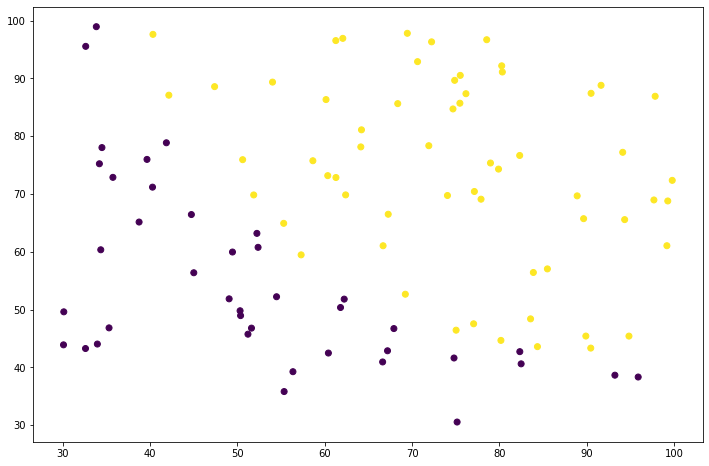

In [3]:
plt.figure(figsize=(12, 8))
plt.scatter(X[:, 0], X[:, 1], c=y)
plt.show()

In [4]:
def initialize_params(X):
    _, nr_features = X.shape
    w0 = np.zeros((nr_features, 1), dtype=np.float_)
    b = 0.0
    return w0, b


def activation(Z):
    return 1 / (1 + np.exp(-Z))


def predict(X, w, b):
    A = activation(np.matmul(X, w) + b)
    return np.round(A)


def calc_gradient(X, y, w, b):
    m = len(X)
    A = activation(np.matmul(X, w) + b)
    cost = (-1 / m) * np.sum(np.multiply(y, np.log(A)) + np.multiply(1 - y, np.log(1 - A)))
    
    dZ = A - y
    dw = (1 / m) * np.matmul(X.T, dZ)
    db = (1 / m) * np.sum(dZ)
    return cost, dw, db

In [5]:
def optimize(X, y, alpha, nr_iterations=10000):
    w, b = initialize_params(X)
    costs = []
    for _ in range(nr_iterations):
        cost, dw, db = calc_gradient(X, y, w, b)
        costs.append(cost)
        w = w - alpha * dw
        b = b - alpha * db
    return costs, w, b


alpha = 0.001
costs, w, b = optimize(X, y, alpha)

In [6]:
predictions = predict(X, w, b)


def accuracy(predicted, ground_truth):
    return np.sum(predicted == ground_truth) / len(ground_truth)


print(accuracy(predictions, y))

0.6


In [10]:
import sklearn.metrics as mcs


print(mcs.accuracy_score(predictions, y))
print(mcs.roc_auc_score(y, predictions))

# https://en.wikipedia.org/wiki/Receiver_operating_characteristic

0.6
0.5


In [11]:
mcs.confusion_matrix(y, predictions)

array([[ 0, 40],
       [ 0, 60]])

In [12]:
print(np.squeeze(predictions))

[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1.]


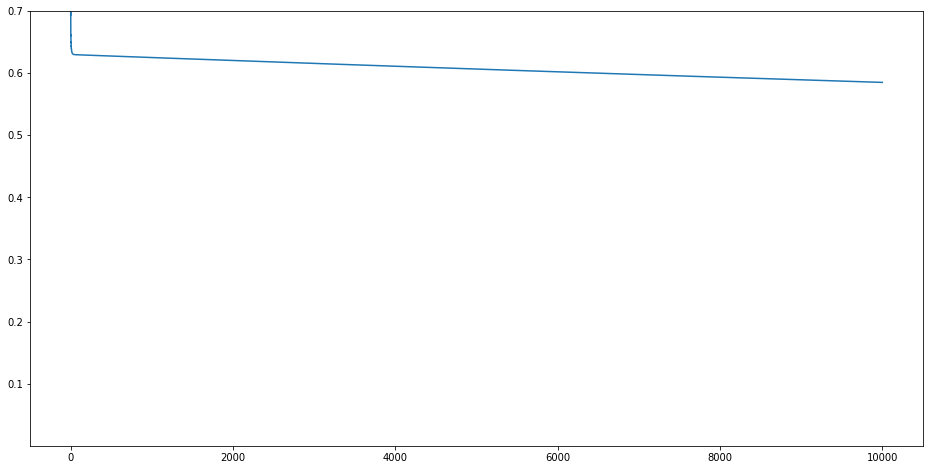

In [13]:
figure = plt.figure(figsize=(16, 8))
plt.plot(costs)
plt.ylim(0.0001, 0.7)
plt.show()

In [14]:
m = np.mean(X, axis=0)
s = np.std(X, axis=0, ddof=1)


X = (X - m) / s

In [15]:
alpha = 0.001
costs, w, b = optimize(X, y, alpha, nr_iterations=10000)

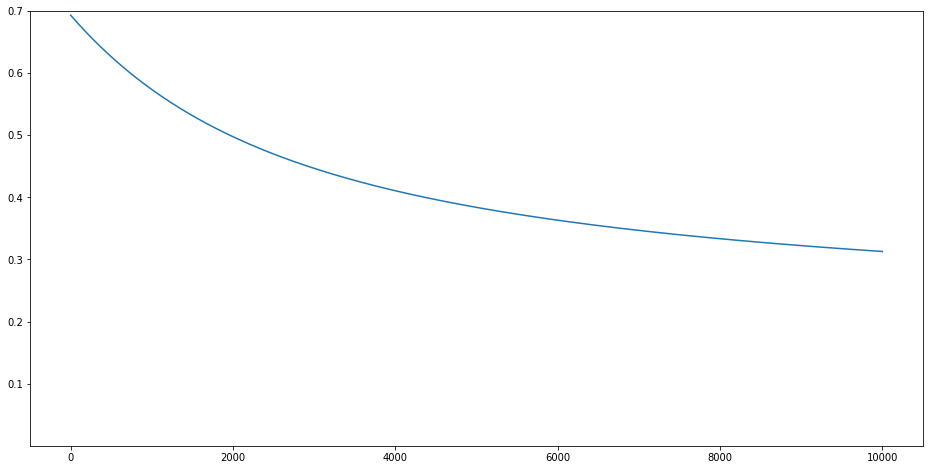

In [16]:
figure = plt.figure(figsize=(16, 8))
plt.plot(costs)
plt.ylim(0.0001, 0.7)
plt.show()

In [17]:
predictions = predict(X, w, b)


print(mcs.accuracy_score(predictions, y))
print(mcs.roc_auc_score(y, predictions))


mcs.confusion_matrix(y, predictions)

0.9
0.8958333333333333


array([[35,  5],
       [ 5, 55]])